<a href="https://colab.research.google.com/github/Ensyllis/Notes-and-Projects/blob/main/Algorithmic_Trader_Beginner_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Algorithmic Trading Time! yay!
#Using dual moving average cross voer, when as hort-term average crosses over into the long-term average.
#When short term is gaining momentum, sell is when long-term average is crossing short-term average

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Load Daata
from google.colab import files
uploaded = files.upload()

Saving AAPL (1).csv to AAPL (1).csv


In [ ]:
#Store the Data
AAPL = pd.read_csv('AAPL (1).csv')
#Show the Data
AAPL

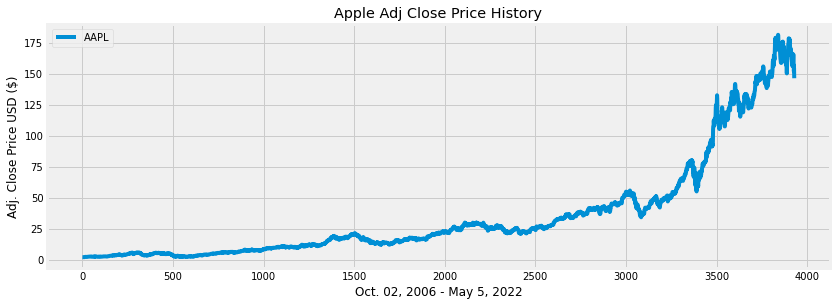

In [ ]:
#Visualize the Data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj Close Price History')
plt.xlabel('Oct. 02, 2006 - May 5, 2022')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create the (Simple moving average) short-term average, 30 days
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window= 30).mean()
SMA30

In [ ]:
#Create the long-term average, basically a Simple moving average but with 100 days
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

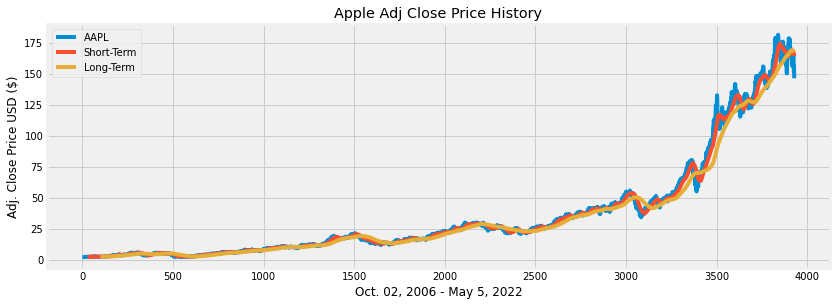

In [ ]:
#Visualize the Data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'Short-Term')
plt.plot(SMA100['Adj Close'], label = 'Long-Term')
plt.title('Apple Adj Close Price History')
plt.xlabel('Oct. 02, 2006 - May 5, 2022')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create the new dataframe to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,2.285951,NaN,NaN
1,2.262133,NaN,NaN
2,2.301830,NaN,NaN
3,2.285036,NaN,NaN
4,2.266408,NaN,NaN
...,...,...,...
3925,156.540009,167.499898,168.321375
3926,157.279999,166.948744,168.141586
3927,152.059998,166.201955,167.923659
3928,154.509995,165.507542,167.680667


In [ ]:
#Function to return the buy and sell price.
def buy_sell(data):
  #These two basically look at the simple moving average and long-term moving average at every itteration
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag !=1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag !=0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
    
  return (sigPriceBuy, sigPriceSell)

In [ ]:
#Store and buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]


In [ ]:
#Show the Data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,2.285951,NaN,NaN,NaN,NaN
1,2.262133,NaN,NaN,NaN,NaN
2,2.301830,NaN,NaN,NaN,NaN
3,2.285036,NaN,NaN,NaN,NaN
4,2.266408,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3925,156.540009,167.499898,168.321375,NaN,NaN
3926,157.279999,166.948744,168.141586,NaN,NaN
3927,152.059998,166.201955,167.923659,NaN,NaN
3928,154.509995,165.507542,167.680667,NaN,NaN


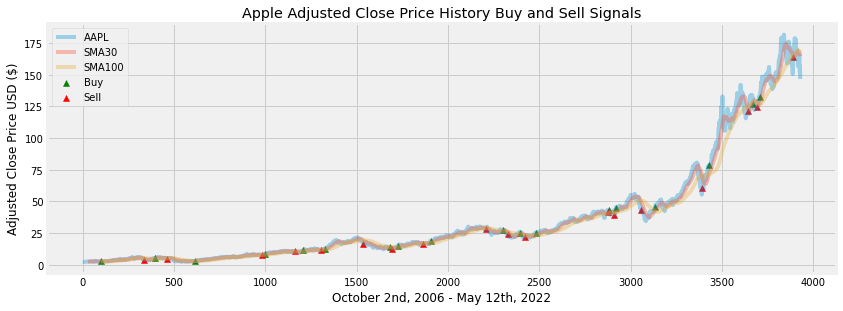

In [ ]:
#Visualize the Data and the Strategy to buy and sell the stock
plt.figure(figsize =(12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = '^', color = 'red')
plt.title('Apple Adjusted Close Price History Buy and Sell Signals')
plt.xlabel('October 2nd, 2006 - May 12th, 2022')
plt.ylabel('Adjusted Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()